# Laboratory Work 2  
## The Perceptron: A Single-Layer Linear Classification Device  

#Part A. Environment setup


In [9]:
#Step 2. Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Step 3. Checking versions

import sklearn
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", plt.matplotlib.__version__)
print("Scikit-learn version:", sklearn.__version__)

NumPy version: 2.0.2
Pandas version: 2.2.2
Matplotlib version: 3.10.0
Scikit-learn version: 1.6.1


#Part B. Manual computation


In [10]:
#Step 4. Consider the following training data for a credit approval decision problem with two input features. x1 - income score, x2 - credit history

X_train = np.array([
    [0.8, 0.6],
    [0.3, 0.2],
    [0.6, 0.8],
    [0.2, 0.4]
])

y_train = np.array([1, 0, 1, 0])

print("Feature matrix shape:", X_train.shape)
print("Target vector shape:", y_train.shape)

Feature matrix shape: (4, 2)
Target vector shape: (4,)


In [11]:
#Step 5. Initialize the perceptron with the following values:

w1 = 0.5
w2 = 0.5
b  = -0.5
eta  = 1.0


print("Initial w1 =", w1)
print("Initial w2 =", w2)
print("Initial b  =", b)
print("Learning rate eta =", eta)

Initial w1 = 0.5
Initial w2 = 0.5
Initial b  = -0.5
Learning rate eta = 1.0


In [12]:
#Step 6. Compute weight sum for sample 1.

x1 = X_train[0][0]
x2 = X_train[0][1]

z = w1*x1 + w2*x2 + b

print("x1 =", x1)
print("x2 =", x2)
print("Weighted sum z =", z)

x1 = 0.8
x2 = 0.6
Weighted sum z = 0.19999999999999996


In [13]:
#Step 7. Apply activation function

if z >= 0:
    y = 1
else:
    y = 0

print("Predicted output y =", y)

Predicted output y = 1


In [14]:
#Step 8.Compare with desired output and compute error

d = y_train[0]
error = d - y

print("Desired output d =", d)
print("Error (d - y) =", error)

if error == 0:
    print("No weight update required (correct classification)")
else:
    print("Weight update required")

Desired output d = 1
Error (d - y) = 0
No weight update required (correct classification)


In [15]:
#Step 9.
#Continue for remaining samples and record results in table (Epoch 1)

#Reinitialize parameters to original values
w1 = 0.5
w2 = 0.5
b = -0.5

results = []

for i in range(len(X_train)):

    x1 = X_train[i][0]
    x2 = X_train[i][1]
    d = y_train[i]

    # Compute weighted sum
    z = w1*x1 + w2*x2 + b

    # Apply activation
    if z >= 0:
        y = 1
    else:
        y = 0

    # Compute error
    error = d - y

    # Check if update required
    if error != 0:
        update_required = "Yes"
    else:
        update_required = "No"

    # Update weights if necessary
    w1 = w1 + eta*error*x1
    w2 = w2 + eta*error*x2
    b  = b  + eta*error

    results.append([i+1, x1, x2, z, y, d, error, update_required])

# Create table
epoch1_table = pd.DataFrame(results, columns=[
    "Sample", "x1", "x2", "z", "y", "d", "d-y", "Update Required?"
])

epoch1_table

,Sample,x1,x2,z,y,d,d-y,Update Required?
0,1,0.8,0.6,0.20,1,1,0,No
1,2,0.3,0.2,-0.25,0,0,0,No
2,3,0.6,0.8,0.20,1,1,0,No
3,4,0.2,0.4,-0.20,0,0,0,No


In [16]:
#Epoch 1 parameters

print("Final w1 =", w1)
print("Final w2 =", w2)
print("Final b  =", b)

Final w1 = 0.5
Final w2 = 0.5
Final b  = -0.5


#Part C. Python implementation with Scikit learn


In [17]:
#Step 10. Create the training data
import numpy as np

X_train = np.array([
    [0.8, 0.6],
    [0.3, 0.2],
    [0.6, 0.8],
    [0.2, 0.4]
])

y_train = np.array([1, 0, 1, 0])

print("Feature matrix shape:", X_train.shape)
print("Target vector shape:", y_train.shape)

Feature matrix shape: (4, 2)
Target vector shape: (4,)


In [18]:
#Step 11.Initialize perceptron with specified parameters

from sklearn.linear_model import Perceptron

perceptron = Perceptron(
    eta0=1.0,           # learning rate
    max_iter=100,       # maximum number of epochs
    tol=1e-3,           # convergence tolerance
    random_state=42,    # reproducibility
    verbose=1           # display training progress
)

print("Perceptron initialized.")

Perceptron initialized.


In [19]:
#Step 12.Train the perceptron on the data

perceptron.fit(X_train, y_train)

# Display learned parameters
print("\nLearned weights (w1, w2):", perceptron.coef_)
print("Learned bias (b):", perceptron.intercept_)
print("Number of iterations:", perceptron.n_iter_)

-- Epoch 1
Norm: 0.64, NNZs: 2, Bias: 0.000000, T: 4, Avg. loss: 0.340000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.84, NNZs: 2, Bias: 0.000000, T: 8, Avg. loss: 0.417500
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.44, NNZs: 2, Bias: -1.000000, T: 12, Avg. loss: 0.190000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.44, NNZs: 2, Bias: -1.000000, T: 16, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.44, NNZs: 2, Bias: -1.000000, T: 20, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.44, NNZs: 2, Bias: -1.000000, T: 24, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.44, NNZs: 2, Bias: -1.000000, T: 28, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.44, NNZs: 2, Bias: -1.000000, T: 32, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1.44, NNZs: 2, Bias: -1.000000, T: 36, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Conve

In [20]:
#Step 13. Make predictions and evaluate accuracy

from sklearn.metrics import accuracy_score

#Generate predictions
y_pred = perceptron.predict(X_train)

#Calculate accuracy
accuracy = accuracy_score(y_train, y_pred)

print("\nTraining accuracy:", accuracy * 100, "%")

#Display predictions vs actual values
print("\nSample-by-sample results:")
for i in range(len(y_train)):
    status = "Correct" if y_train[i] == y_pred[i] else "INCORRECT"
    print(f"Sample {i+1}: Actual={y_train[i]}, Predicted={y_pred[i]} - {status}")


Training accuracy: 100.0 %

Sample-by-sample results:
Sample 1: Actual=1, Predicted=1 - Correct
Sample 2: Actual=0, Predicted=0 - Correct
Sample 3: Actual=1, Predicted=1 - Correct
Sample 4: Actual=0, Predicted=0 - Correct


In [21]:
#Step 14. Generate and display confusion matrix and classification report

from sklearn.metrics import confusion_matrix, classification_report

#Compute confusion matrix
cm = confusion_matrix(y_train, y_pred)

print("\nConfusion Matrix:")
print(cm)

#Display classification report
print("\nClassification Report:")
print(classification_report(y_train, y_pred,
      target_names=['Rejected', 'Approved']))


Confusion Matrix:
[[2 0]
 [0 2]]

Classification Report:
              precision    recall  f1-score   support

    Rejected       1.00      1.00      1.00         2
    Approved       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [22]:
#Step 15.Record the results

print("Learned weight w1:", perceptron.coef_[0][0])
print("Learned weight w2:", perceptron.coef_[0][1])
print("Learned bias b:", perceptron.intercept_[0])
print("Training accuracy:", accuracy * 100, "%")
print("Number of iterations to converge:", perceptron.n_iter_)

Learned weight w1: 1.2
Learned weight w2: 0.8000000000000002
Learned bias b: -1.0
Training accuracy: 100.0 %
Number of iterations to converge: 9


#Part D. Vizualization

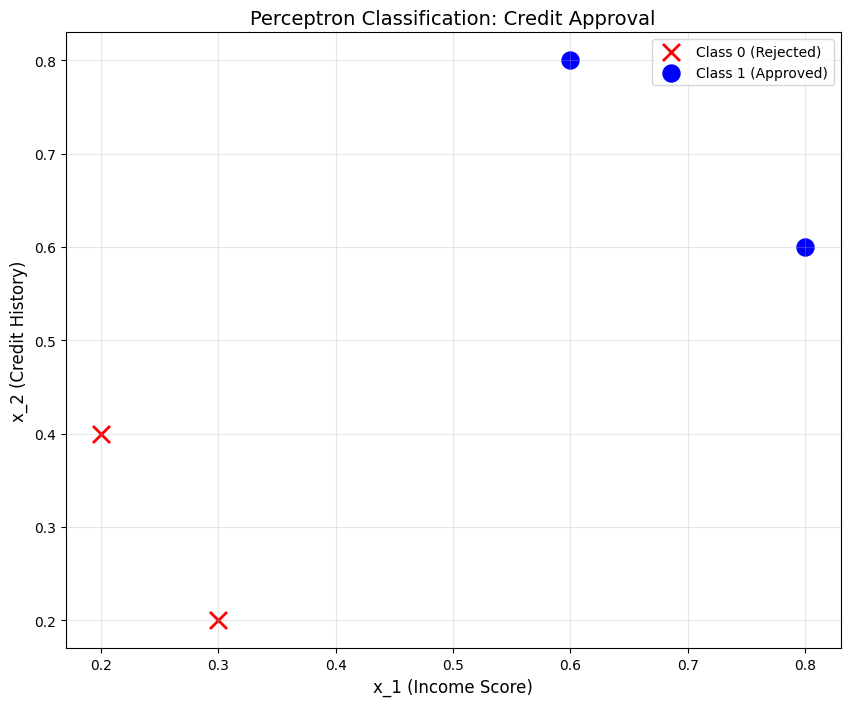

In [23]:
#Step 16.Create a scatter plot of the training data:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

#Plot class 0(Rejected)
class_0 = X_train[y_train == 0]
plt.scatter(class_0[:, 0], class_0[:, 1],
            c='red', marker='x', s=150,
            linewidths=2, label='Class 0 (Rejected)')

#Plot class 1(Approved)
class_1 = X_train[y_train == 1]
plt.scatter(class_1[:, 0], class_1[:, 1],
            c='blue', marker='o', s=150,
            label='Class 1 (Approved)')

plt.xlabel('x_1 (Income Score)', fontsize=12)
plt.ylabel('x_2 (Credit History)', fontsize=12)
plt.title('Perceptron Classification: Credit Approval', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

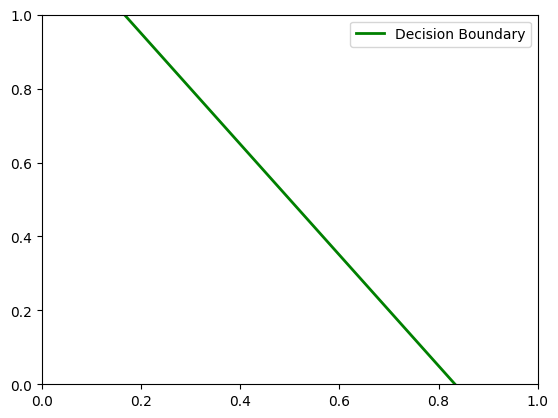


Decision Boundary Equation:
1.2000*x1 + 0.8000*x2 + -1.0000 = 0


In [24]:
#Step 17. Add the decision boundary to the plot

#Extract learned weights and bias
w1, w2 = perceptron.coef_[0]
b = perceptron.intercept_[0]

#Decision boundary equation:
#w1*x1 + w2*x2 + b = 0
#x2 = -(w1/w2)*x1 - (b/w2)

x1_range = np.linspace(0, 1, 100)
x2_boundary = -(w1 / w2) * x1_range - (b / w2)

#Plot decision boundary
plt.plot(x1_range, x2_boundary, 'g-', linewidth=2,
         label='Decision Boundary')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()

plt.savefig('perceptron_decision_boundary.png', dpi=150)
plt.show()

#Print decision boundary equation
print("\nDecision Boundary Equation:")
print(f"{w1:.4f}*x1 + {w2:.4f}*x2 + {b:.4f} = 0")

In [25]:
#Step 18. Record the decision boundary equation

slope = -(w1 / w2)
intercept = -(b / w2)

print("Slope (m) =", slope)
print("Intercept (c) =", intercept)
print(f"Decision boundary in slope-intercept form:")
print(f"x2 = {slope:.4f}*x1 + {intercept:.4f}")

Slope (m) = -1.4999999999999996
Intercept (c) = 1.2499999999999998
Decision boundary in slope-intercept form:
x2 = -1.5000*x1 + 1.2500


#Part E. Testing with new data

In [26]:
# Step 19. Classify new instances using the trained perceptron model

#Define new test instances
X_new = np.array([
    [0.7, 0.5],
    [0.4, 0.3],
    [0.5, 0.7]
])

#Make predictions
predictions = perceptron.predict(X_new)

print("New Instance Predictions:")

for i in range(len(X_new)):
    x1 = X_new[i][0]
    x2 = X_new[i][1]

    if predictions[i] == 1:
        decision = "Approved"
    else:
        decision = "Rejected"

    print(f"Instance {i+1}: x1={x1}, x2={x2} -> {decision}")

New Instance Predictions:
Instance 1: x1=0.7, x2=0.5 -> Approved
Instance 2: x1=0.4, x2=0.3 -> Rejected
Instance 3: x1=0.5, x2=0.7 -> Approved


In [27]:
#Step 20. Verify one prediction manually using weighted sum and step activation

#Select first new instance for manual verification
x1 = X_new[0][0]
x2 = X_new[0][1]

#Compute weighted sum manually
z_manual = w1*x1 + w2*x2 + b

#Apply activation function
if z_manual >= 0:
    y_manual = 1
else:
    y_manual = 0

print("Manual Verification for Instance 1")
print("Weighted sum z =", z_manual)
print("Predicted class (manual) =", y_manual)
print("Predicted class (model) =", predictions[0])

Manual Verification for Instance 1
Weighted sum z = 0.24
Predicted class (manual) = 1
Predicted class (model) = 1


#Individual Assignment. Variant 3.


##Problem 3.1

In [28]:
#Problem 3.1. Initialize parameters
w1 = 0.5
w2 = 0.5
w3 = -0.4
b = -0.3
eta = 1.0

#Input vector
x1 = 0.7
x2 = 0.4
x3 = 0.6
d = 1

print("Initial weights:")
print("w1 =", w1)
print("w2 =", w2)
print("w3 =", w3)
print("b  =", b)

Initial weights:
w1 = 0.5
w2 = 0.5
w3 = -0.4
b  = -0.3


In [29]:
#Compute weighted sum
z = w1*x1 + w2*x2 + w3*x3 + b

print("Weighted sum z =", z)

Weighted sum z = 0.010000000000000064


In [30]:
#Apply activation function
if z >= 0:
    y = 1
else:
    y = 0

print("Predicted output y =", y)

Predicted output y = 1


In [31]:
#Compute error and update weights
error = d - y

print("Error (d - y) =", error)

#Update rule
w1_new = w1 + eta*error*x1
w2_new = w2 + eta*error*x2
w3_new = w3 + eta*error*x3
b_new  = b  + eta*error

print("\nUpdated weights:")
print("w1 =", w1_new)
print("w2 =", w2_new)
print("w3 =", w3_new)
print("b  =", b_new)

Error (d - y) = 0

Updated weights:
w1 = 0.5
w2 = 0.5
w3 = -0.4
b  = -0.3


In [32]:
#Problem 3.2
#Define training data

X_qc = np.array([
    [0.5, 0.7],
    [0.2, 0.1],
    [0.6, 0.6],
    [0.1, 0.3],
    [0.8, 0.5],
    [0.3, 0.2]
])

y_qc = np.array([1, 0, 1, 0, 1, 0])

##Problem 3.2

In [33]:
#Problem 3.2. Define training data

X_qc = np.array([
    [0.5, 0.7],
    [0.2, 0.1],
    [0.6, 0.6],
    [0.1, 0.3],
    [0.8, 0.5],
    [0.3, 0.2]
])

y_qc = np.array([1, 0, 1, 0, 1, 0])

In [34]:
#Train perceptron with verbose output
from sklearn.linear_model import Perceptron

perceptron_qc = Perceptron(
    eta0=1.0,
    max_iter=100,
    random_state=42,
    verbose=1
)

perceptron_qc.fit(X_qc, y_qc)

print("\nFinal weights:", perceptron_qc.coef_)
print("Final bias:", perceptron_qc.intercept_)
print("Iterations:", perceptron_qc.n_iter_)

-- Epoch 1
Norm: 0.50, NNZs: 2, Bias: 0.000000, T: 6, Avg. loss: 0.216667
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.06, NNZs: 2, Bias: 0.000000, T: 12, Avg. loss: 0.163333
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.41, NNZs: 2, Bias: -1.000000, T: 18, Avg. loss: 0.166667
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.41, NNZs: 2, Bias: -1.000000, T: 24, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.41, NNZs: 2, Bias: -1.000000, T: 30, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.41, NNZs: 2, Bias: -1.000000, T: 36, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.41, NNZs: 2, Bias: -1.000000, T: 42, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.41, NNZs: 2, Bias: -1.000000, T: 48, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1.41, NNZs: 2, Bias: -1.000000, T: 54, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Conv

In [35]:
#Compute decision boundary equation

w1, w2 = perceptron_qc.coef_[0]
b = perceptron_qc.intercept_[0]

slope = -(w1/w2)
intercept = -(b/w2)

print("Decision boundary:")
print(f"{w1:.4f}*x1 + {w2:.4f}*x2 + {b:.4f} = 0")
print(f"x2 = {slope:.4f}*x1 + {intercept:.4f}")

Decision boundary:
1.0000*x1 + 1.0000*x2 + -1.0000 = 0
x2 = -1.0000*x1 + 1.0000


In [36]:
# Classify new unit (0.4, 0.5)
new_unit = np.array([[0.4, 0.5]])

prediction = perceptron_qc.predict(new_unit)

print("New unit prediction:", prediction[0])

New unit prediction: 0


##Problem 3.3

In [37]:
# Problem 3.3

false_positive_cost = 200
false_negative_cost = 50

fp_per_1000 = 15
fn_per_1000 = 25

annual_units = 50000

fp_total = (annual_units/1000) * fp_per_1000
fn_total = (annual_units/1000) * fn_per_1000

total_cost = fp_total*false_positive_cost + fn_total*false_negative_cost

print("Total false positives:", fp_total)
print("Total false negatives:", fn_total)
print("Annual misclassification cost = $", total_cost)

Total false positives: 750.0
Total false negatives: 1250.0
Annual misclassification cost = $ 212500.0
